###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

(1000, 5)
(1000,)


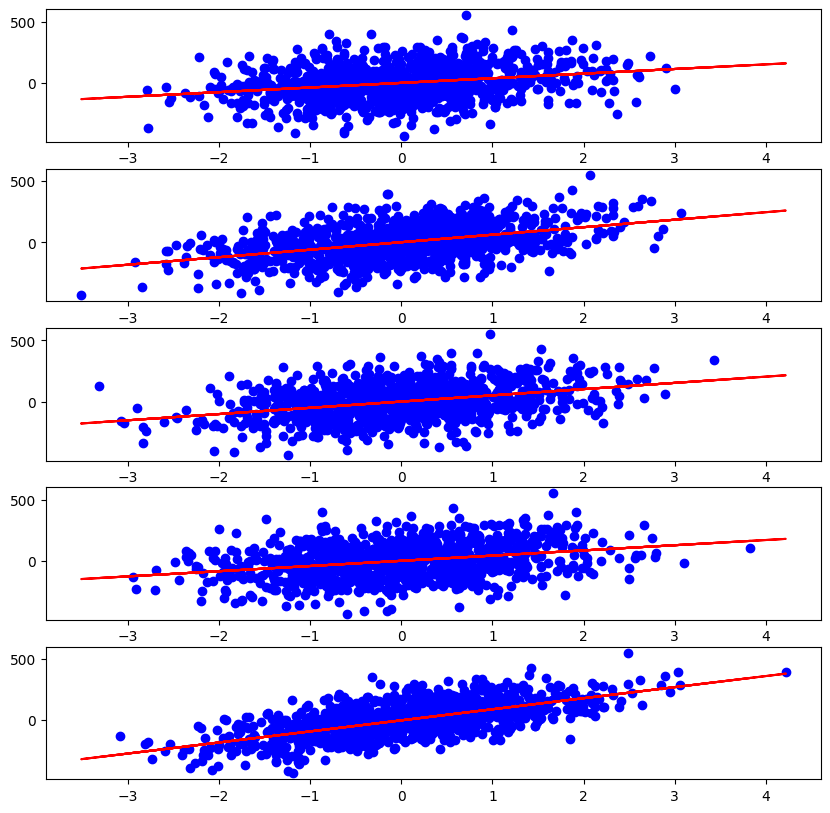

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression as mr
X,y = mr(n_samples=1000, n_features=5, noise=0)
print(X.shape)
print(y.shape)

fig2,ax= plt.subplots(5,1,figsize=(10,10))
for i in range(5):
  plt.subplot(5,1,1+i) # 231+i
  plt.scatter(X[:,i],y, color='blue')
  # Compute regression line parameters
  X_mean = np.mean(X[:,i])
  y_mean = np.mean(y)

  numerator = np.sum((X[:,i] - X_mean) * (y - y_mean))
  denominator = np.sum((X[:,i] - X_mean) ** 2)

  m = numerator / denominator  # Slope
  b = y_mean - m * X_mean  # Intercept
  plt.plot(X, m * X + b, color='red', label='Regression Line')


### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

(1000, 2)
(1000,)


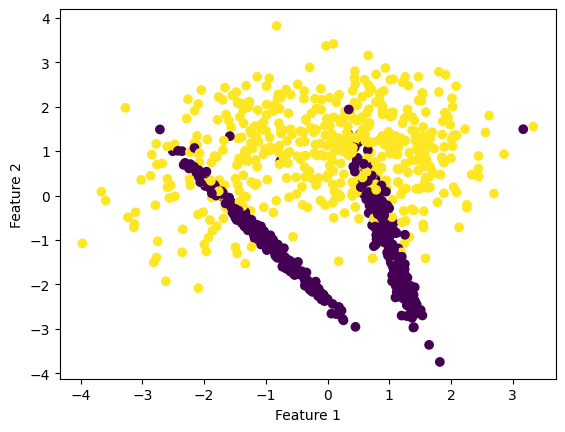

In [9]:
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=2)
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

(1000, 2)
(1000,)


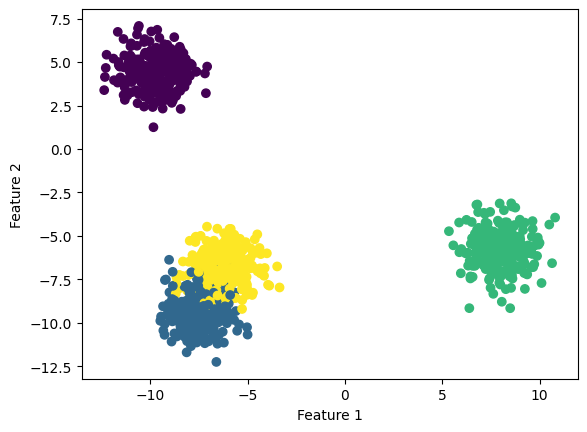

In [10]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, centers=4, n_features=2)
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [43]:
import requests as req
from bs4 import BeautifulSoup

url = 'https://www.worldometers.info/coronavirus/'
page = req.get(url)
print(page.status_code)

soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', class_='table-bordered')


headers = []
first_row=table.find('tr');

for i in first_row.find_all('th'):
 title = i.text
 headers.append(title)

print(headers)

import pandas as pd
mydata = pd.DataFrame(columns = headers)
for j in table.find_all('tr')[1:]:
  row_data = j.find_all('td')
  row = [i.text for i in row_data]
  length = len(mydata)
  mydata.loc[length] = row
headers = ['Country,Other', 'Continent', 'Population', 'TotalCases', 'NewCases', 
           'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']
selected_columns = mydata[headers]

print(selected_columns)


200
['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']
         Country,Other          Continent Population   TotalCases NewCases  \
0    \nNorth America\n      North America             131,889,132            
1             \nAsia\n               Asia             221,500,265            
2           \nEurope\n             Europe             253,406,198            
3    \nSouth America\n      South America              70,200,879            
4          \nOceania\n  Australia/Oceania              14,895,771            
..                 ...                ...        ...          ...      ...   
242             Total:      South America              70,200,879          

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

(1000, 2)
(1000,)


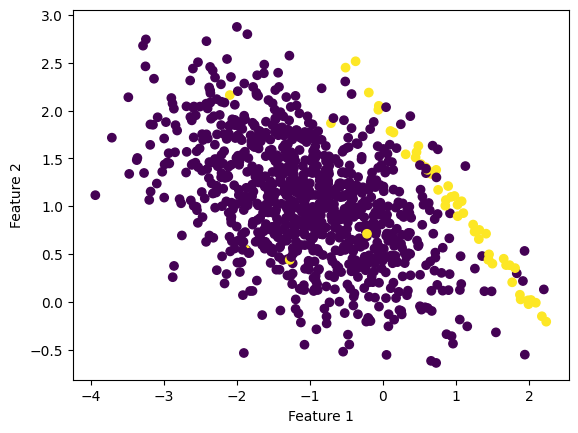

Class 0 count: 945
Class 1 count: 55


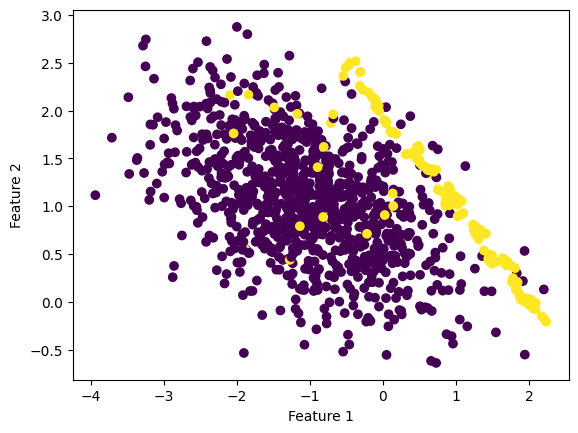

Class 0 count after oversampling: 945
Class 1 count after oversampling: 189


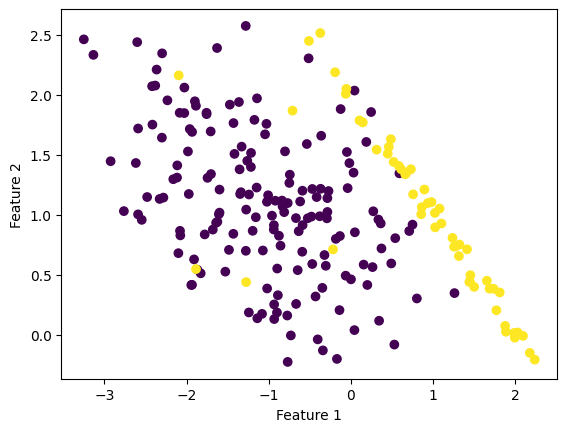

Class 0 count after undersampling: 165
Class 1 count after undersampling: 55


In [57]:
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=1,weights=[0.95, 0.05])
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#verify using numpy
y_array = np.array(y)
class_counts = np.bincount(y_array)
print("Class 0 count:", class_counts[0])
print("Class 1 count:", class_counts[1])

#Oversampling the minority data
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.2)
X_resampled, y_resampled = smote.fit_resample(X, y)

plt.scatter(X_resampled[:, 0],X_resampled[:,1], c=y_resampled)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

y_resampled_array = np.array(y_resampled)
class_counts_after = np.bincount(y_resampled_array)
print("Class 0 count after oversampling:", class_counts_after[0])
print("Class 1 count after oversampling:", class_counts_after[1])

#Undersampling
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy=0.333, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

plt.scatter(X_resampled[:, 0],X_resampled[:,1], c=y_resampled)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

y_resampled_array = np.array(y_resampled)
class_counts_after = np.bincount(y_resampled_array)
print("Class 0 count after undersampling:", class_counts_after[0])
print("Class 1 count after undersampling:", class_counts_after[1])

##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * 


In [58]:
from sklearn.datasets import load_iris
iris_data = load_iris()


In [59]:
X = iris_data.data  
y = iris_data.target  

In [65]:
df = pd.DataFrame(data=iris_data.data,columns=iris_data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [68]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (105, 4)
Shape of y_train: (105,)
Shape of X_test: (45, 4)
Shape of y_test: (45,)


In [75]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the same scaler
X_test_scaled = scaler.transform(X_test)

In [77]:
print(X_train_scaled[:5])

[[-0.4134164  -1.46200287 -0.09951105 -0.32339776]
 [ 0.55122187 -0.50256349  0.71770262  0.35303182]
 [ 0.67180165  0.21701605  0.95119225  0.75888956]
 [ 0.91296121 -0.02284379  0.30909579  0.2177459 ]
 [ 1.63643991  1.41631528  1.30142668  1.70589097]]
